## Installation and Setup

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import requests
import zipfile
import os
import glob
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [ ]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [ ]:
download_file(
    'https://www.dropbox.com/s/ievh0sesad015z0/trash_inst_material.zip?dl=1',
    'trash_inst_material.zip'
)

unzip(zip_file='trash_inst_material.zip')

Extracted all


In [ ]:
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
import yaml

attr = {
    'path': cwd+'/trash_inst_material',
    'train': 'train/images',
    'val': 'val/images',

    'names': {
        0: 'rov',
        1: 'plant',
        2: 'animal_fish',
        3: 'animal_starfish',
        4: 'animal_shells',
        5: 'animal_crab',
        6: 'animal_eel',
        7: 'animal_etc',
        8: 'trash_etc',
        9: 'trash_fabric',
        10: 'trash_fishing_gear',
        11: 'trash_metal',
        12: 'trash_paper',
        13: 'trash_plastic',
        14: 'trash_rubber',
        15: 'trash_wood',
    }
}

In [ ]:
with open('trashcan_inst_material.yaml', 'w') as f:
    yaml.dump(attr, f)

In [ ]:
EPOCHS = 5
!yolo \
task=segment \
mode=train \
model=yolov8n-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8n-seg \
exist_ok=True \
amp=False

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.74M/6.74M [00:00<00:00, 148MB/s]
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=trashcan_inst_material.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=Fal

In [ ]:
EPOCHS = 5
!yolo \
task=detect \
mode=train \
model=yolov8s-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8s-seg \
exist_ok=True \
amp=False

100% 22.8M/22.8M [00:00<00:00, 98.7MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=trashcan_inst_material.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False

In [ ]:
EPOCHS = 20
!yolo \
task=detect \
mode=train \
model=yolov8m-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8mnew-seg \
exist_ok=True \
amp=False

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 52.4M/52.4M [00:00<00:00, 71.8MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=trashcan_inst_material.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8mnew-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=F

In [ ]:
# Download the inference data.
download_file(
    'https://www.dropbox.com/s/smdsotzz5al3bi2/trash_segment_inference_data.zip?dl=1',
    'trash_segment_inference_data.zip'
)

unzip(zip_file='trash_segment_inference_data.zip')

In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in either a 1x1 grid or 2x2 grid.
    """
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

In [ ]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_inst_material/val/images/' \
name='yolov8m_predict' \
exist_ok=True \
save=True

In [ ]:
visualize('runs/segment/yolov8m_predict')

In [ ]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_segment_inference_data/manythings.mp4' \
name='yolov8m_predict_videos1' \
exist_ok=True \
save=True

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,231,648 parameters, 0 gradients, 110.0 GFLOPs

video 1/1 (frame 1/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 3 trash_plastics, 67.5ms
video 1/1 (frame 2/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 rov, 1 trash_plastic, 34.7ms
video 1/1 (frame 3/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 (no detections), 34.7ms
video 1/1 (frame 4/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 2 rovs, 1 trash_etc, 34.7ms
video 1/1 (frame 5/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 2 rovs, 1 trash_etc, 27.6ms
video 1/1 (frame 6/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 2 rovs, 1 trash_etc, 25.9ms
video 1/1 (frame 7/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 2 trash_plastics, 26.0ms
video 1/1 (frame 8/1168) /con

In [ ]:
!ffmpeg -i /content/runs/segment/yolov8m_predict_videos1/manythings.avi -c:v libx264 -preset fast -crf 18 -c:a aac -b:a 192k /content/runs/segment/yolov8m_predict_videos1/manythings.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from google.colab import files
files.download("/content/runs/segment/yolov8m_predict_videos1/manythings.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls -R /content/runs/segment/


/content/runs/segment/:
yolov8m_predict  yolov8m_predict_videos1  yolov8m-seg  yolov8n-seg  yolov8s-seg

/content/runs/segment/yolov8m_predict:
vid_000002_frame0000013.jpg  vid_000055_frame0000175.jpg  vid_000113_frame0000006.jpg
vid_000002_frame0000014.jpg  vid_000063_frame0000001.jpg  vid_000113_frame0000007.jpg
vid_000002_frame0000015.jpg  vid_000063_frame0000002.jpg  vid_000114_frame0000038.jpg
vid_000002_frame0000016.jpg  vid_000063_frame0000003.jpg  vid_000114_frame0000042.jpg
vid_000002_frame0000017.jpg  vid_000063_frame0000040.jpg  vid_000116_frame0000003.jpg
vid_000002_frame0000018.jpg  vid_000063_frame0000044.jpg  vid_000116_frame0000006.jpg
vid_000002_frame0000019.jpg  vid_000069_frame0000001.jpg  vid_000116_frame0000010.jpg
vid_000002_frame0000020.jpg  vid_000069_frame0000002.jpg  vid_000116_frame0000013.jpg
vid_000002_frame0000021.jpg  vid_000069_frame0000003.jpg  vid_000116_frame0000015.jpg
vid_000003_frame0000001.jpg  vid_000069_frame0000006.jpg  vid_000116_frame0000020.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy model to Google Drive
!cp /content/runs/segment/yolov8m-seg/weights/best.pt /content/drive/MyDrive/yolov8m_best.pt

Mounted at /content/drive


In [ ]:
# for futher usage of model
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/yolov8m_best.pt /content/
# from ultralytics import YOLO
# model = YOLO("/content/yolov8m_best.pt")




In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
model_dir = "runs/segment/yolov8m-seg/weights"
save_path = "/content/drive/MyDrive/yolov8m_best.pt"

# Save best model
if os.path.exists(f"{model_dir}/best.pt"):
    !cp {model_dir}/best.pt {save_path}
    print(f"✅ Model saved to {save_path}")
else:
    print("⚠️ Model file not found. Make sure training is completed.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved to /content/drive/MyDrive/yolov8m_best.pt


In [ ]:
import os

model_path = "runs/segment/yolov8m-seg/weights/best.pt"

if os.path.exists(model_path):
    print("✅ Model file exists.")
else:
    print("⚠️ Model file not found. Retraining may be needed.")


✅ Model file exists.


In [ ]:
!cp runs/segment/yolov8n-seg/weights/best.pt /content/drive/MyDrive/yolov8n_best.pt
print("✅ Model saved to Google Drive")


✅ Model saved to Google Drive


Available columns: Index(['epoch', 'time', 'train/box_loss', 'train/seg_loss', 'train/cls_loss',
       'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)',
       'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)',
       'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)',
       'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


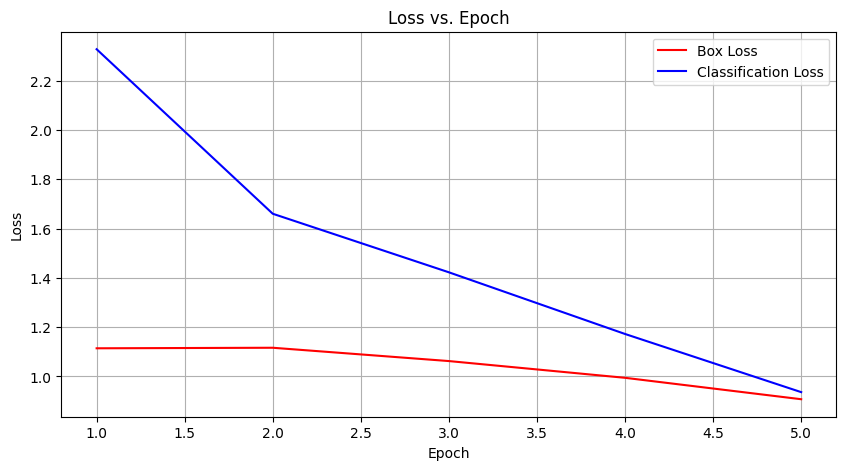

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
csv_path = 'runs/segment/yolov8m-seg/results.csv'  # Adjust for your model
df = pd.read_csv(csv_path)

# Print available columns
print("Available columns:", df.columns)

# Plot Loss vs. Epoch
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss', color='red')
plt.plot(df['epoch'], df['train/cls_loss'], label='Classification Loss', color='blue')

# Check if 'train/mask_loss' exists before plotting
if 'train/mask_loss' in df.columns:
    plt.plot(df['epoch'], df['train/mask_loss'], label='Mask Loss', color='green')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from tabulate import tabulate

models = {
    "YOLOv8n-seg": "runs/segment/yolov8n-seg/results.csv",
    "YOLOv8s-seg": "runs/segment/yolov8s-seg/results.csv",
    "YOLOv8m-seg": "runs/segment/yolov8m-seg/results.csv"
}

performance_data = []
columns = ["Model", "mAP50 (%)", "mAP50-95 (%)", "Precision (%)", "Recall (%)"]

for model_name, csv_path in models.items():
    try:
        df = pd.read_csv(csv_path)
        last_epoch = df.iloc[-1]

        # Extract segmentation (M) metrics
        mAP_50 = last_epoch['metrics/mAP50(M)']
        mAP_50_95 = last_epoch['metrics/mAP50-95(M)']
        precision = last_epoch['metrics/precision(M)']
        recall = last_epoch['metrics/recall(M)']

        performance_data.append([
            model_name,
            round(mAP_50 * 100, 2),
            round(mAP_50_95 * 100, 2),
            round(precision * 100, 2),
            round(recall * 100, 2)
        ])
    except Exception as e:
        print(f"Error processing {model_name}: {e}")

# Display results if valid data exists
if performance_data:
    df_comparison = pd.DataFrame(performance_data, columns=columns)
    print(tabulate(df_comparison, headers='keys', tablefmt='grid'))
else:
    print("No valid data found.")


+----+-------------+-------------+----------------+-----------------+--------------+
|    | Model       |   mAP50 (%) |   mAP50-95 (%) |   Precision (%) |   Recall (%) |
+====+=============+=============+================+=================+==============+
|  0 | YOLOv8n-seg |       37.49 |          20.88 |           57.97 |        34.83 |
+----+-------------+-------------+----------------+-----------------+--------------+
|  1 | YOLOv8s-seg |       52.5  |          28.6  |           65.05 |        47.89 |
+----+-------------+-------------+----------------+-----------------+--------------+
|  2 | YOLOv8m-seg |       51.55 |          27.69 |           64.98 |        48.74 |
+----+-------------+-------------+----------------+-----------------+--------------+
